## Hyperparameter Tuning

In [1]:
# Import libraries
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dataset
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week6\day2\hpt_small.csv')
data

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K
...,...,...,...,...,...,...,...,...
495,32,Private,HS-grad,Married,White,Male,60,<=50K
496,57,Private,HS-grad,Widowed,White,Male,42,>50K
497,62,Private,HS-grad,Widowed,White,Female,40,<=50K
498,43,Private,Some-college,Never-married,White,Male,25,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             500 non-null    int64 
 1   wc              500 non-null    object
 2   education       500 non-null    object
 3   marital status  500 non-null    object
 4   race            500 non-null    object
 5   gender          500 non-null    object
 6   hours per week  500 non-null    int64 
 7   IncomeClass     500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
data.isnull().sum(axis=0)

age               0
wc                0
education         0
marital status    0
race              0
gender            0
hours per week    0
IncomeClass       0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hours per week'}>]], dtype=object)

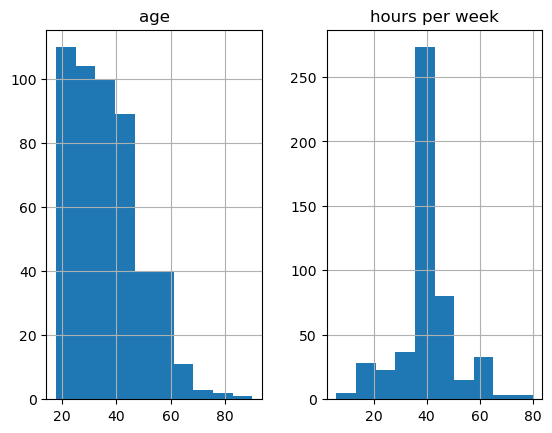

In [5]:
data.hist()

<Axes: >

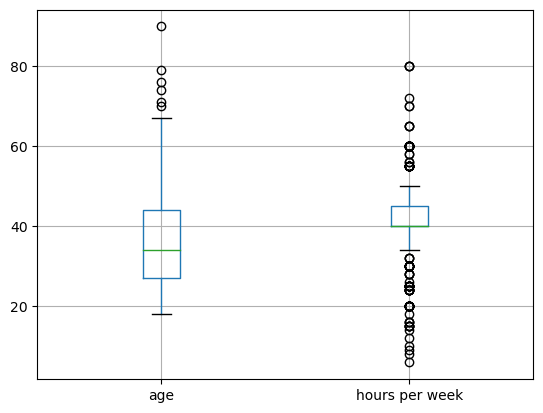

In [6]:
data.boxplot()

In [7]:
# Create Dummy variables
data_prep = pd.get_dummies(data, drop_first=True, dtype='int')
data_prep.head()

,age,hours per week,wc_ Local-gov,wc_ Private,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital status_ Never-married,marital status_ Widowed,marital status_Married,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Male,IncomeClass_ >50K
0,38,40,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1,28,40,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,37,40,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,31,50,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,42,40,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1


In [8]:
# Create X and Y Variables
X = data_prep.iloc[:, :-1]
Y = data_prep.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, 
            random_state=101)

## Hand C

### kernel = 'rbf'

In [10]:
from sklearn.svm import SVC
svc = SVC(random_state=1234, kernel="rbf",C=1)
svc.fit(X_train, y_train)
y_pred_1 = svc.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                            classification_report, confusion_matrix

print('confusion  matrix:\n', confusion_matrix(y_test, y_pred_1))
print()
print('accuracy: ', accuracy_score(y_test, y_pred_1))
print('roc_auc_score: ', roc_auc_score(y_test, y_pred_1))
print('f1_score: ', f1_score(y_test, y_pred_1))
print('precision_score: ', precision_score(y_test, y_pred_1))
print('recall_score: ', recall_score(y_test, y_pred_1))
print()
print('classification_report:\n', classification_report(y_test, y_pred_1))

confusion  matrix:
 [[119   0]
 [ 31   0]]

accuracy:  0.7933333333333333
roc_auc_score:  0.5
f1_score:  0.0
precision_score:  0.0
recall_score:  0.0

classification_report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150



### kernel = 'lienar'

In [12]:
from sklearn.svm import SVC
svc = SVC(random_state=1234, kernel="linear",C=1)
svc.fit(X_train, y_train)
y_pred_1 = svc.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                            classification_report, confusion_matrix

print('confusion  matrix:\n', confusion_matrix(y_test, y_pred_1))
print()
print('accuracy: ', accuracy_score(y_test, y_pred_1))
print('roc_auc_score: ', roc_auc_score(y_test, y_pred_1))
print('f1_score: ', f1_score(y_test, y_pred_1))
print('precision_score: ', precision_score(y_test, y_pred_1))
print('recall_score: ', recall_score(y_test, y_pred_1))
print()
print('classification_report:\n', classification_report(y_test, y_pred_1))

confusion  matrix:
 [[107  12]
 [ 14  17]]

accuracy:  0.8266666666666667
roc_auc_score:  0.7237733803198699
f1_score:  0.5666666666666667
precision_score:  0.5862068965517241
recall_score:  0.5483870967741935

classification_report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       119
           1       0.59      0.55      0.57        31

    accuracy                           0.83       150
   macro avg       0.74      0.72      0.73       150
weighted avg       0.82      0.83      0.82       150



### kernel = 'poly'

In [14]:
from sklearn.svm import SVC
svc = SVC(random_state=1234, kernel="poly", C=1, degree=3)
svc.fit(X_train, y_train)
y_pred_1 = svc.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                            classification_report, confusion_matrix

print('confusion  matrix:\n', confusion_matrix(y_test, y_pred_1))
print()
print('accuracy: ', accuracy_score(y_test, y_pred_1))
print('roc_auc_score: ', roc_auc_score(y_test, y_pred_1))
print('f1_score: ', f1_score(y_test, y_pred_1))
print('precision_score: ', precision_score(y_test, y_pred_1))
print('recall_score: ', recall_score(y_test, y_pred_1))
print()
print('classification_report:\n', classification_report(y_test, y_pred_1))

confusion  matrix:
 [[114   5]
 [ 29   2]]

accuracy:  0.7733333333333333
roc_auc_score:  0.5112496611547845
f1_score:  0.10526315789473684
precision_score:  0.2857142857142857
recall_score:  0.06451612903225806

classification_report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       119
           1       0.29      0.06      0.11        31

    accuracy                           0.77       150
   macro avg       0.54      0.51      0.49       150
weighted avg       0.69      0.77      0.71       150



## Using for loop

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X,Y,cv=10,scoring ="accuracy")
    k_scores.append(scores.mean())

print(k_scores)

[0.706, 0.746, 0.714, 0.752, 0.744, 0.744, 0.732, 0.744, 0.744, 0.7460000000000001, 0.75, 0.76, 0.752, 0.7420000000000001, 0.7539999999999999, 0.756, 0.76, 0.7579999999999999, 0.76, 0.762, 0.756, 0.756, 0.762, 0.7699999999999999, 0.754, 0.752, 0.756, 0.764, 0.746, 0.76]


Text(0, 0.5, 'Cross_validation_acc')

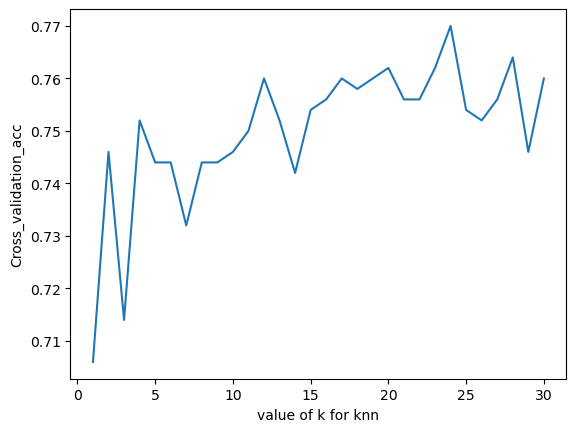

In [17]:
import matplotlib.pyplot as plt
plt.plot(k_range,k_scores)
plt.xlabel("value of k for knn")
plt.ylabel("Cross_validation_acc")

In [18]:
for i, j in zip(k_range, k_scores):
    if j == max(k_scores):
        print(i, j)

24 0.7699999999999999


## GridSearchCV

In [48]:
# Import and create Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(random_state=1234)

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# define parameters for Support Vector Classifier
svc_param = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10], 
            'kernel':['rbf', 'linear'],
            'gamma':[0.1, 0.25, 0.5, 1, 5],
            'degree': [3, 4, 5, 6, 7, 8]
            }

# The parameters results in 7 x 2 x 5 = 70 different combinations
# CV=10 for 70 different combinations mean 700 jobs/model runs

svc_grid = GridSearchCV(estimator=svc, 
                        param_grid=svc_param,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)

# Fit the data to do Grid Search for Support Vector
svc_grid_fit = svc_grid.fit(X_train, y_train)

cv_results_svc = pd.DataFrame.from_dict(svc_grid_fit.cv_results_)

svc_top_rank = cv_results_svc[cv_results_svc['rank_test_score'] == 1]

In [49]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
svc_top_rank.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
121,0.040227,0.008454,0.004303,0.000459,0.5,3,0.10,linear,"{'C': 0.5, 'degree': 3, 'gamma': 0.1, 'kernel'...",0.771429,0.771429,0.771429,0.828571,0.885714,0.857143,0.771429,0.828571,0.828571,0.8,0.811429,0.038756,1,0.819048,0.822222,0.825397,0.822222,0.8,0.803175,0.809524,0.815873,0.809524,0.834921,0.81619,0.010184
123,0.035825,0.005967,0.004304,0.000459,0.5,3,0.25,linear,"{'C': 0.5, 'degree': 3, 'gamma': 0.25, 'kernel...",0.771429,0.771429,0.771429,0.828571,0.885714,0.857143,0.771429,0.828571,0.828571,0.8,0.811429,0.038756,1,0.819048,0.822222,0.825397,0.822222,0.8,0.803175,0.809524,0.815873,0.809524,0.834921,0.81619,0.010184
125,0.035825,0.006084,0.004003,0.000447,0.5,3,0.50,linear,"{'C': 0.5, 'degree': 3, 'gamma': 0.5, 'kernel'...",0.771429,0.771429,0.771429,0.828571,0.885714,0.857143,0.771429,0.828571,0.828571,0.8,0.811429,0.038756,1,0.819048,0.822222,0.825397,0.822222,0.8,0.803175,0.809524,0.815873,0.809524,0.834921,0.81619,0.010184
127,0.037226,0.008127,0.004003,0.000447,0.5,3,1.00,linear,"{'C': 0.5, 'degree': 3, 'gamma': 1, 'kernel': ...",0.771429,0.771429,0.771429,0.828571,0.885714,0.857143,0.771429,0.828571,0.828571,0.8,0.811429,0.038756,1,0.819048,0.822222,0.825397,0.822222,0.8,0.803175,0.809524,0.815873,0.809524,0.834921,0.81619,0.010184
129,0.039828,0.006680,0.004803,0.000749,0.5,3,5.00,linear,"{'C': 0.5, 'degree': 3, 'gamma': 5, 'kernel': ...",0.771429,0.771429,0.771429,0.828571,0.885714,0.857143,0.771429,0.828571,0.828571,0.8,0.811429,0.038756,1,0.819048,0.822222,0.825397,0.822222,0.8,0.803175,0.809524,0.815873,0.809524,0.834921,0.81619,0.010184


In [50]:
# Print the train and test score of the Support Vector Classifier

print('\n\n')
print('Support Vector Classifier')
print(svc_top_rank['mean_test_score'])
print(svc_top_rank['mean_train_score'])

# Print the best parameters of the Support Vector Classifier
print('\n The best Parameters are : ')
print(svc_grid_fit.best_params_)




Support Vector Classifier
121    0.811429
123    0.811429
125    0.811429
127    0.811429
129    0.811429
131    0.811429
133    0.811429
135    0.811429
137    0.811429
139    0.811429
141    0.811429
143    0.811429
145    0.811429
147    0.811429
149    0.811429
151    0.811429
153    0.811429
155    0.811429
157    0.811429
159    0.811429
161    0.811429
163    0.811429
165    0.811429
167    0.811429
169    0.811429
171    0.811429
173    0.811429
175    0.811429
177    0.811429
179    0.811429
Name: mean_test_score, dtype: float64
121    0.81619
123    0.81619
125    0.81619
127    0.81619
129    0.81619
131    0.81619
133    0.81619
135    0.81619
137    0.81619
139    0.81619
141    0.81619
143    0.81619
145    0.81619
147    0.81619
149    0.81619
151    0.81619
153    0.81619
155    0.81619
157    0.81619
159    0.81619
161    0.81619
163    0.81619
165    0.81619
167    0.81619
169    0.81619
171    0.81619
173    0.81619
175    0.81619
177    0.81619
179    0.81619
Nam

In [51]:
# -----------------------------------------------------------------
# Compare multiple Classifiers and tune the hyperparameters 
# using GridSearchCV
# -----------------------------------------------------------------

# Import and create Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1234)

# Import and create Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(random_state=1234)

# Import and create Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=1234)


# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameters for Random Forest
rfc_param = {'n_estimators':[10,15,20,100,200], 
            'min_samples_split':[8,16],
            'min_samples_leaf':[1,2,3,4,5]
            }

# The parameters results in 3 x 2 x 5 = 30 different combinations
# CV=10 for 30 different combinations mean 300 jobs/model runs

rfc_grid = GridSearchCV(estimator=rfc, 
                        param_grid=rfc_param,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)

# Fit the data to do Grid Search
rfc_grid_fit = rfc_grid.fit(X_train, y_train)

# Get the results of the GridSearchCV
cv_results_rfc = pd.DataFrame.from_dict(rfc_grid_fit.cv_results_)



# Define parameters for Logistic Regression
lrc_param = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10], 
            'penalty':["l1", "l2", "elasticnet"],
            'solver':['liblinear','lbfgs', 'saga']
            }

# The parameters results in 7 x 1 x 3 = 21 different combinations
# CV=10 for 21 different combinations mean 210 jobs/model runs

lrc_grid = GridSearchCV(estimator=lrc, 
                        param_grid=lrc_param,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True,
                        verbose=True)

# Fit the data to do Grid Search using Logistic Regression
lrc_grid_fit = lrc_grid.fit(X_train, y_train)

# Get the Grid Search results for Logistic Regression
cv_results_lrc = pd.DataFrame.from_dict(lrc_grid_fit.cv_results_)


# define parameters for Support Vector Classifier
svc_param = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10], 
            'kernel':['rbf', 'linear'],
            'gamma':[0.1, 0.25, 0.5, 1, 5]
            }

# The parameters results in 7 x 2 x 5 = 70 different combinations
# CV=10 for 70 different combinations mean 700 jobs/model runs

svc_grid = GridSearchCV(estimator=svc, 
                        param_grid=svc_param,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)

# Fit the data to do Grid Search for Support Vector
svc_grid_fit = svc_grid.fit(X_train, y_train)

# Get the Grid Search results for Support Vector
cv_results_svc = pd.DataFrame.from_dict(svc_grid_fit.cv_results_)

# Get the top ranked test score for all the three classifiers
rfc_top_rank = cv_results_rfc[cv_results_rfc['rank_test_score'] == 1]
lrc_top_rank = cv_results_lrc[cv_results_lrc['rank_test_score'] == 1]
svc_top_rank = cv_results_svc[cv_results_svc['rank_test_score'] == 1]


# Print the train and test score of the Random Forest Classifier

print('\n\n')
print('Random Forest Classifier')
print(rfc_top_rank['mean_test_score'])
print(rfc_top_rank['mean_train_score'])

# Print the best parameters of the Random Forest Classifier
print('\n The best Parameters are : ')
print(rfc_grid_fit.best_params_)

# Print the train and test score of the Logistic Regression Classifier

print('\n\n')
print('Logistic Regression Classifier')
print(lrc_top_rank['mean_test_score'])
print(lrc_top_rank['mean_train_score'])

# Print the best parameters of the Logistic Regression Classifier
print('\n The best Parameters are : ')
print(lrc_grid_fit.best_params_)

# Print the train and test score of the Support Vector Classifier

print('\n\n')
print('Support Vector Classifier')
print(svc_top_rank['mean_test_score'])
print(svc_top_rank['mean_train_score'])

# Print the best parameters of the Support Vector Classifier
print('\n The best Parameters are : ')
print(svc_grid_fit.best_params_)

Fitting 10 folds for each of 63 candidates, totalling 630 fits



Random Forest Classifier
21    0.808571
47    0.808571
Name: mean_test_score, dtype: float64
21    0.866349
47    0.843492
Name: mean_train_score, dtype: float64

 The best Parameters are : 
{'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 15}



Logistic Regression Classifier
30    0.805714
Name: mean_test_score, dtype: float64
30    0.810159
Name: mean_train_score, dtype: float64

 The best Parameters are : 
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}



Support Vector Classifier
21    0.811429
23    0.811429
25    0.811429
27    0.811429
29    0.811429
Name: mean_test_score, dtype: float64
21    0.81619
23    0.81619
25    0.81619
27    0.81619
29    0.81619
Name: mean_train_score, dtype: float64

 The best Parameters are : 
{'C': 0.5, 'gamma': 0.1, 'kernel': 'linear'}


## RandomizedSearchCV

In [57]:
# -----------------------------------------------------------------
# Perform RandomizedSearchCV for hyperparameter tuning
# -----------------------------------------------------------------

# Import libraries
import pandas as pd

# Read dataset
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week6\day2\hpt_small.csv')

# Create Dummy variables
data_prep = pd.get_dummies(data, drop_first=True, dtype='int')

# Create X and Y Variables
X = data_prep.iloc[:, :-1]
Y = data_prep.iloc[:, -1]

# Import necessary library for train-test split
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

# Import and create Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1234)

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# define parameters for Random Forest
rfc_param = {'n_estimators':[5,10,15,20,30,40], 
            'min_samples_split':[8,16,32,64],
            'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
            }

# The parameters results in 3 x 2 x 5 = 30 different combinations

# Create the RandomizedSearchCV object
rfc_rs = RandomizedSearchCV(estimator=rfc, 
                        param_distributions=rfc_param,
                        scoring='accuracy',
                        cv=10,
                        n_iter=10,
                        return_train_score=True,
                        random_state=1234)

# n_iter selects 10 combinations out of 30 possible
# Now 10 x 10 = 100 jobs will be executed

# Fit the data to RandomizedSearchCV object
rfc_rs_fit = rfc_rs.fit(X_train, y_train)

# Get the results of RandomizedSearch
cv_results_rfc_rs = pd.DataFrame.from_dict(rfc_rs_fit.cv_results_)

rfc_rs_top_rank = cv_results_rfc_rs[cv_results_rfc_rs['rank_test_score'] == 1]

print('\n\n')
print('Random Forest Classifier')
print(rfc_rs_top_rank['mean_test_score'])
print(rfc_rs_top_rank['mean_train_score'])

# Print the best parameters of Randomized Search for Random Forest
print('\n The best Parameters are : ')
print(rfc_rs_fit.best_params_)




Random Forest Classifier
8    0.825
Name: mean_test_score, dtype: float64
8    0.828611
Name: mean_train_score, dtype: float64

 The best Parameters are : 
{'n_estimators': 15, 'min_samples_split': 8, 'min_samples_leaf': 15}


#### Ən yaxşı parametrləri tapdıqdan sonra bu parametrlərlə təlim olunmuş modeli X_test və Y_test üzərində test etmək üçün aşağıdakı kimi bir kod yazmaq olar:

In [60]:
# Ən yaxşı parametrlərlə Random Forest modelini yaradın
best_rfc = rfc_rs_fit.best_estimator_

# Test datası üzərində proqnozlar edin
y_pred = best_rfc.predict(X_test)

# Modelin performansını yoxlayın
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dəqiqlik (Accuracy) dəyərini hesablayın
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {accuracy:.4f}')

# Daha ətraflı performans statistikası (Classification Report) çap edin
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix çap edin
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Test Set Accuracy: 0.7300

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        69
           1       0.67      0.26      0.37        31

    accuracy                           0.73       100
   macro avg       0.70      0.60      0.60       100
weighted avg       0.72      0.73      0.69       100

Confusion Matrix:
[[65  4]
 [23  8]]


In [100]:
# Import and create Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(random_state=1234)

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# define parameters for Support Vector Classifier
svc_param = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10], 
            'kernel':['rbf', 'linear'],
            'gamma':[0.1, 0.25, 0.5, 1, 5],
            'degree': [3, 4, 5, 6, 7, 8]
            }

# The parameters results in 7 x 2 x 5 = 70 different combinations
# CV=10 for 70 different combinations mean 700 jobs/model runs

svc_rs = RandomizedSearchCV(estimator=svc, 
                           param_distributions=svc_param,
                           scoring= 'accuracy',
                           cv=10,
                           n_iter=10,
                           return_train_score=True,
                           random_state=1234)

# Fit the data to do RandomizedSearchCV for Support Vector
svc_rs_fit = svc_rs.fit(X_train, y_train)

cv_results_svc_rs = pd.DataFrame.from_dict(svc_rs_fit.cv_results_)

svc_rs_top_rank = cv_results_svc_rs[cv_results_svc_rs['rank_test_score'] == 1]

In [105]:
svc_rs_top_rank

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.102968,0.017287,0.009109,0.000712,linear,0.25,6,0.5,"{'kernel': 'linear', 'gamma': 0.25, 'degree': ...",0.925,0.75,0.800,0.875,0.75,0.925,0.725,0.900,0.75,0.875,0.8275,0.076199,1,0.825000,0.844444,0.844444,0.836111,0.850000,0.833333,0.852778,0.830556,0.847222,0.838889,0.840278,0.008539
3,0.102637,0.025488,0.008409,0.000803,linear,0.10,4,0.5,"{'kernel': 'linear', 'gamma': 0.1, 'degree': 4...",0.925,0.75,0.800,0.875,0.75,0.925,0.725,0.900,0.75,0.875,0.8275,0.076199,1,0.825000,0.844444,0.844444,0.836111,0.850000,0.833333,0.852778,0.830556,0.847222,0.838889,0.840278,0.008539
6,0.093968,0.018202,0.008312,0.000903,linear,5.00,5,0.5,"{'kernel': 'linear', 'gamma': 5, 'degree': 5, ...",0.925,0.75,0.800,0.875,0.75,0.925,0.725,0.900,0.75,0.875,0.8275,0.076199,1,0.825000,0.844444,0.844444,0.836111,0.850000,0.833333,0.852778,0.830556,0.847222,0.838889,0.840278,0.008539
7,0.378171,0.049243,0.007706,0.000782,linear,0.25,7,10.0,"{'kernel': 'linear', 'gamma': 0.25, 'degree': ...",0.925,0.70,0.825,0.875,0.75,0.900,0.725,0.925,0.80,0.850,0.8275,0.077822,1,0.836111,0.847222,0.847222,0.841667,0.855556,0.838889,0.855556,0.836111,0.850000,0.844444,0.845278,0.006810


In [102]:
print('\n\n')
print('Random Forest Classifier')
print(svc_rs_top_rank['mean_test_score'])
print(svc_rs_top_rank['mean_train_score'])

# Print the best parameters of Randomized Search for Random Forest
print('\n The best Parameters are : ')
print(svc_rs_fit.best_params_)




Random Forest Classifier
0    0.8275
3    0.8275
6    0.8275
7    0.8275
Name: mean_test_score, dtype: float64
0    0.840278
3    0.840278
6    0.840278
7    0.845278
Name: mean_train_score, dtype: float64

 The best Parameters are : 
{'kernel': 'linear', 'gamma': 0.25, 'degree': 6, 'C': 0.5}


In [103]:
# Ən yaxşı parametrlərlə SVC modelini yaradın
best_svc = svc_rs_fit.best_estimator_

# Test datası üzərində proqnozlar edin
y_pred = best_svc.predict(X_test)

# Modelin performansını yoxlayın
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dəqiqlik (Accuracy) dəyərini hesablayın
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {accuracy:.4f}')

# Daha ətraflı performans statistikası (Classification Report) çap edin
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix çap edin
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Test Set Accuracy: 0.7700

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        69
           1       0.68      0.48      0.57        31

    accuracy                           0.77       100
   macro avg       0.74      0.69      0.70       100
weighted avg       0.76      0.77      0.76       100

Confusion Matrix:
[[62  7]
 [16 15]]


## Implementation of Bayesian Optimization

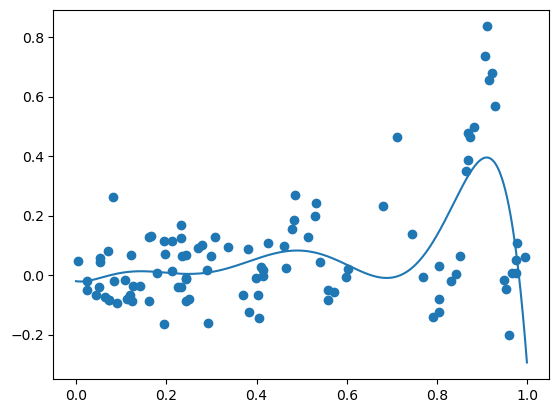

>x=0.912, f()=0.395145, actual=0.675
>x=0.596, f()=0.034290, actual=0.006
>x=0.204, f()=0.006957, actual=-0.097
>x=0.606, f()=0.023072, actual=-0.094
>x=0.886, f()=0.393335, actual=0.675
>x=0.099, f()=0.006968, actual=0.026
>x=0.911, f()=0.436938, actual=0.889
>x=0.234, f()=-0.002088, actual=0.032
>x=0.186, f()=0.005632, actual=0.212
>x=0.911, f()=0.467260, actual=0.652
>x=0.911, f()=0.478883, actual=0.825
>x=0.270, f()=0.004062, actual=-0.044
>x=0.788, f()=0.102822, actual=-0.122
>x=0.911, f()=0.500065, actual=0.890
>x=0.732, f()=-0.051177, actual=0.164
>x=0.281, f()=0.001575, actual=0.067
>x=0.441, f()=0.082078, actual=0.119
>x=0.402, f()=0.064376, actual=-0.012
>x=0.911, f()=0.518364, actual=0.628
>x=0.912, f()=0.524157, actual=0.897
>x=0.912, f()=0.542896, actual=0.933
>x=0.209, f()=0.008074, actual=0.141
>x=0.432, f()=0.079404, actual=-0.105
>x=0.533, f()=0.067555, actual=0.199
>x=0.179, f()=0.022496, actual=0.001
>x=0.224, f()=0.007937, actual=0.191
>x=0.687, f()=-0.063102, actua

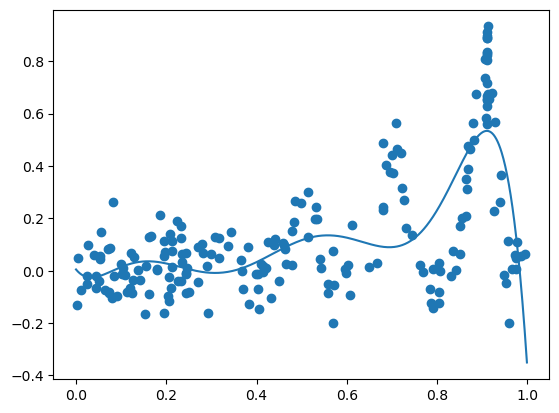

Best Result: x=0.912, y=0.933


In [111]:
# example of bayesian optimization for a 1d function from scratch
from math import sin
from math import pi
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot

# objective function
# Estimation of model fit in a given setting
# in this example will be defined as a accuracy
def objective(x, noise=0.1):
    noise = normal(loc=0, scale=noise)
    return (x**2 * sin(5 * pi * x)**6.0) + noise

# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
    # calculate the best surrogate score found so far
    yhat, _ = surrogate(model, X)
    best = max(yhat)
    # calculate mean and stdev via surrogate function
    mu, std = surrogate(model, Xsamples)
    if mu.ndim > 1:
            mu = mu[:, 0]
    # calculate the probability of improvement
    probs = norm.cdf((mu - best) / (std+1E-9))
    return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
    # random search, generate random samples
    Xsamples = random(100)
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    # calculate the acquisition function for each sample
    scores = acquisition(X, Xsamples, model)
    # locate the index of the largest scores
    ix = argmax(scores)
    return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    pyplot.scatter(X, y)
    # line plot of surrogate function across domain
    Xsamples = asarray(arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    pyplot.plot(Xsamples, ysamples)
    # show the plot
    pyplot.show()

# sample the domain sparsely with noise
X = random(100)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(100):
    # select the next point to sample
    x = opt_acquisition(X, y, model)
    # sample the point
    actual = objective(x)
    # summarize the finding
    est, _ = surrogate(model, [[x]])
    print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
    # add the data to the dataset
    X = vstack((X, [[x]]))
    y = vstack((y, [[actual]]))
    # update the model
    model.fit(X, y)

# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

## BayesSearchCV

In [116]:
# !pip install scikit-optimize

In [1]:
import pandas as pd
# Read dataset
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week6\day2\hpt_small.csv')
data

# Create Dummy variables
data_prep = pd.get_dummies(data, drop_first=True, dtype='int')
data_prep.head()

# Create X and Y Variables
X = data_prep.iloc[:, :-1]
Y = data_prep.iloc[:, -1]

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, 
            random_state=101)

In [2]:
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer

from sklearn.ensemble import RandomForestClassifier

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    RandomForestClassifier(),
    {
        'n_estimators': Integer(10, 200, prior='log-uniform'),
        'min_samples_split': Integer(8, 16, prior='log-uniform'),
        'min_samples_leaf': Integer(1, 5, prior='log-uniform')
    },
    n_iter=32,
    random_state=0
)

# executes bayesian optimization
opt_rf_bs_fit= opt.fit(X_train, y_train)

cv_results_rf_bs = pd.DataFrame.from_dict(opt_rf_bs_fit.cv_results_)

rf_bs_top_rank = cv_results_rf_bs[cv_results_rf_bs['rank_test_score'] == 1]

In [3]:
rf_bs_top_rank

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.283001,0.050382,0.022211,0.00161,4,8,51,"{'min_samples_leaf': 4, 'min_samples_split': 8...",0.785714,0.8,0.857143,0.785714,0.771429,0.8,0.029966,1


In [4]:
# model can be saved, used for predictions or scoring
print(opt.score(X_test, y_test))

0.82


In [6]:
print('\n\n')
print('RandomForestClassifier')
print(rf_bs_top_rank['mean_test_score'])
# print(rf_bs_top_rank['mean_train_score'])

# Print the best parameters of the Support Vector Classifier
print('\n The best Parameters are : ')
print(opt.best_params_)




RandomForestClassifier
24    0.8
Name: mean_test_score, dtype: float64

 The best Parameters are : 
OrderedDict([('min_samples_leaf', 4), ('min_samples_split', 8), ('n_estimators', 51)])


In [8]:
opt.get_params()

{'cv': None,
 'error_score': 'raise',
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'fit_params': None,
 'iid': 'deprecated',
 'n_iter': 32,
 'n_jobs': 1,
 'n_points': 1,
 'optimizer_kwargs': None,
 'pre_dispatch': '2*n_jobs',
 'random_state': 0,
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'search_spaces': {'n_estimators': Integer(low=10, 

In [9]:
opt.best_estimator_

RandomForestClassifier(min_samples_leaf=4, min_samples_split=8, n_estimators=51)

In [11]:
# Ən yaxşı parametrlərlə SVC modelini yaradın
best_rf = opt_rf_bs_fit.best_estimator_

# Test datası üzərində proqnozlar edin
y_pred = best_rf.predict(X_test)

# Modelin performansını yoxlayın
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dəqiqlik (Accuracy) dəyərini hesablayın
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {accuracy:.4f}')

# Daha ətraflı performans statistikası (Classification Report) çap edin
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix çap edin
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Test Set Accuracy: 0.8200

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       119
           1       0.57      0.52      0.54        31

    accuracy                           0.82       150
   macro avg       0.72      0.71      0.72       150
weighted avg       0.81      0.82      0.82       150

Confusion Matrix:
[[107  12]
 [ 15  16]]


### overfitting edib etmediyini yoxlayiram

In [13]:
train_score = opt_rf_bs_fit.score(X_train, y_train)
test_score = opt_rf_bs_fit.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.86
Test Score: 0.82


In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(opt_rf_bs_fit, X, Y, cv=5)

print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))

C:\Users\dell\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 16, 10] before, using random point [3, 16, 15]
  warnings.warn(


Cross-Validation Scores: [0.81 0.76 0.82 0.77 0.79]
Mean Score: 0.79
